In [2]:
import h5py

# Define the path to your data file
# The '../' means "go up one directory from 'notebooks' and then go down into 'data/raw'"
filepath = '../data/raw/Transition1x.h5'  # Make sure this filename is exactly correct!

# Open the file and list the keys inside
with h5py.File(filepath, 'r') as f:
    print("Keys available in the H5 file:", list(f.keys()))

Keys available in the H5 file: ['data', 'test', 'train', 'val']


In [4]:
import h5py
import pandas as pd

# Define the file path
filepath = '../data/raw/Transition1x.h5'

# --- Diagnosis Step ---
# Let's explore the structure of the HDF5 file manually

print("Exploring the HDF5 file structure...\n")

# Open the file
with h5py.File(filepath, 'r') as f:
    
    # Get the 'data' group
    data_group = f['data']
    
    print(f"Object type of the key 'data': {type(data_group)}")
    
    # What is inside the 'data' group?
    print(f"Keys inside the 'data' group: {list(data_group.keys())}")
    
    # Let's look at the first key inside 'data'
    if len(list(data_group.keys())) > 0:
        first_key_inside = list(data_group.keys())[0]
        print(f"\nThe first key is '{first_key_inside}'. Let's inspect it.")
        
        first_item = data_group[first_key_inside]
        print(f"Object type of '{first_key_inside}': {type(first_item)}")
        
        # If this is another group, what's inside it?
        if isinstance(first_item, h5py.Group):
            print(f"Keys inside '{first_key_inside}': {list(first_item.keys())}")

Exploring the HDF5 file structure...

Object type of the key 'data': <class 'h5py._hl.group.Group'>
Keys inside the 'data' group: ['C2H2N2O', 'C2H2N2O2', 'C2H2N4', 'C2H2O2', 'C2H3N', 'C2H3N3', 'C2H3N3O', 'C2H3N3O2', 'C2H3N5', 'C2H3NO', 'C2H3NO2', 'C2H4N2', 'C2H4N2O', 'C2H4N2O2', 'C2H4N4', 'C2H4N4O', 'C2H4O', 'C2H4O2', 'C2H5N3O', 'C2H5NO', 'C2H5NO2', 'C2H6N2O', 'C2H6O', 'C2H6O2', 'C2HNO', 'C2HNO3', 'C2N2', 'C3H2N2', 'C3H2N2O', 'C3H2N2O2', 'C3H2N4', 'C3H2O', 'C3H2O3', 'C3H3N3', 'C3H3N3O', 'C3H3NO', 'C3H3NO2', 'C3H3NO3', 'C3H4', 'C3H4N2', 'C3H4N2O', 'C3H4N2O2', 'C3H4N4', 'C3H4O', 'C3H4O2', 'C3H4O3', 'C3H5N', 'C3H5N3', 'C3H5N3O', 'C3H5NO', 'C3H5NO2', 'C3H5NO3', 'C3H6N2', 'C3H6N2O', 'C3H6N2O2', 'C3H6O', 'C3H6O2', 'C3H6O3', 'C3H7N', 'C3H7N3', 'C3H7N3O', 'C3H7NO', 'C3H7NO2', 'C3H8', 'C3H8N2O', 'C3H8N2O2', 'C3H8O', 'C3H8O2', 'C3H8O3', 'C3HN', 'C3HN3O', 'C3HNO2', 'C3N2O', 'C4H10', 'C4H10N2O', 'C4H10O', 'C4H10O2', 'C4H10O3', 'C4H2', 'C4H2N2O', 'C4H2O2', 'C4H3N', 'C4H3N3', 'C4H3NO', 'C4H3NO2', 'C

In [7]:
import h5py

# Define the file path
filepath = '../data/raw/Transition1x.h5'

print("--- Inspecting the contents of a single reaction ---")

# Open the file
with h5py.File(filepath, 'r') as f:
    
    # Let's navigate to the very first reaction we found before
    first_reaction_group = f['data']['C2H2N2O']['rxn2091']
    
    # Now, let's list all the keys (the names of the datasets) inside it
    print(f"Keys inside the reaction group 'rxn2091': {list(first_reaction_group.keys())}")

--- Inspecting the contents of a single reaction ---
Keys inside the reaction group 'rxn2091': ['atomic_numbers', 'positions', 'product', 'reactant', 'transition_state', 'wB97x_6-31G(d).energy', 'wB97x_6-31G(d).forces']


In [9]:
import h5py
import pandas as pd
from tqdm.auto import tqdm

# Define the file path
filepath = '../data/raw/Transition1x.h5'

# This list will store the data for each reaction
all_reactions_data = []

print("Extracting energy data from HDF5 file...")

# Open the file
with h5py.File(filepath, 'r') as f:
    
    # Get the main 'data' group
    data_group = f['data']
    
    # Loop through each chemical formula
    for formula_key in tqdm(data_group.keys()):
        formula_group = data_group[formula_key]
        
        # Loop through each reaction
        for rxn_key in formula_group.keys():
            reaction_group = formula_group[rxn_key]
            
            try:
                # --- Extract the Energies ---
                energy_reactant = reaction_group['reactant']['wB97x_6-31G(d).energy'][0]
                energy_ts = reaction_group['transition_state']['wB97x_6-31G(d).energy'][0]
                
                # --- Calculate the Activation Energy ---
                activation_energy = energy_ts - energy_reactant

                # Store the essential data in a dictionary
                reaction_info = {
                    'reaction_id': rxn_key,
                    'formula': formula_key,
                    'activation_energy': activation_energy,
                }
                
                # Add this reaction's data to our master list
                all_reactions_data.append(reaction_info)

            except Exception as e:
                # This will catch any other unexpected errors.
                print(f"Could not process reaction {rxn_key} in {formula_key}. Error: {e}")


df_energies = pd.DataFrame(all_reactions_data)

print("\ncomplete!")

Extracting energy data from HDF5 file...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:05<00:00, 33.06it/s]


complete!


In [14]:
# Display the first 5 rows
df_energies.5rows()

SyntaxError: invalid syntax (3449907676.py, line 2)

In [11]:
import h5py

# Define the file path
filepath = '../data/raw/Transition1x.h5'

print("--- Deep Dive Inspection of HDF5 File Contents ---")

# A helper function to recursively print the structure
def print_hdf5_structure(group, prefix=''):
    """Recursively prints the name and type of objects in an HDF5 group."""
    for key in group.keys():
        item = group[key]
        path = f"{prefix}/{key}"
        if isinstance(item, h5py.Dataset):
            # A dataset holds the actual data (like an array of numbers)
            print(f"Dataset: {path} | Shape: {item.shape} | Dtype: {item.dtype}")
        elif isinstance(item, h5py.Group):
            # A group is like a folder
            print(f"Group:   {path}")
            # Recursively call the function to see inside this new group
            print_hdf5_structure(item, prefix=path)

# Open the file
with h5py.File(filepath, 'r') as f:
    
    # Let's navigate to the very first reaction we found before
    first_reaction_group = f['data']['C2H2N2O']['rxn2091']
    
    print("\n--- Contents of a specific reaction ('/data/C2H2N2O/rxn2091'): ---")
    print_hdf5_structure(first_reaction_group, prefix='/data/C2H2N2O/rxn2091')

--- Deep Dive Inspection of HDF5 File Contents ---

--- Contents of a specific reaction ('/data/C2H2N2O/rxn2091'): ---
Dataset: /data/C2H2N2O/rxn2091/atomic_numbers | Shape: (7,) | Dtype: int32
Dataset: /data/C2H2N2O/rxn2091/positions | Shape: (658, 7, 3) | Dtype: float64
Group:   /data/C2H2N2O/rxn2091/product
Dataset: /data/C2H2N2O/rxn2091/product/atomic_numbers | Shape: (7,) | Dtype: int32
Dataset: /data/C2H2N2O/rxn2091/product/hash | Shape: () | Dtype: int64
Dataset: /data/C2H2N2O/rxn2091/product/positions | Shape: (1, 7, 3) | Dtype: float64
Dataset: /data/C2H2N2O/rxn2091/product/wB97x_6-31G(d).energy | Shape: (1,) | Dtype: float64
Dataset: /data/C2H2N2O/rxn2091/product/wB97x_6-31G(d).forces | Shape: (1, 7, 3) | Dtype: float64
Group:   /data/C2H2N2O/rxn2091/reactant
Dataset: /data/C2H2N2O/rxn2091/reactant/atomic_numbers | Shape: (7,) | Dtype: int32
Dataset: /data/C2H2N2O/rxn2091/reactant/hash | Shape: () | Dtype: int64
Dataset: /data/C2H2N2O/rxn2091/reactant/positions | Shape: (1, 7

In [15]:
csv_filepath = '../data/raw/wb97xd3.csv'

print(f"--- Inspecting raw contents of {csv_filepath} ---\n")

with open(csv_filepath, 'r') as f:
    for i in range(5):
        line = f.readline()
        # repr() shows us hidden characters like \n or \t so we can be sure of the format
        print(f"Line {i}: {repr(line)}")

print("\n--- End of Inspection ---")

--- Inspecting raw contents of ../data/raw/wb97xd3.csv ---

Line 0: 'idx,rsmi,psmi,ea,dh\n'
Line 1: '0,[C:1]([c:2]1[n:3][o:4][n:5][n:6]1)([H:7])([H:8])[H:9],[C:1]([C:2]([N:3]=[O:4])=[N+:6]=[N-:5])([H:7])([H:8])[H:9],48.6594840938652,25.8450911920847\n'
Line 2: '1,[C:1]([c:2]1[n:3][o:4][n:5][n:6]1)([H:7])([H:8])[H:9],[C:1]([N:3]=[C:2]=[N:6][N:5]=[O:4])([H:7])([H:8])[H:9],74.2078783503365,25.3575058893897\n'
Line 3: '2,[C:1]([O:2][C:3]([C:4]([O:5][H:13])([H:11])[H:12])([H:9])[H:10])([H:6])([H:7])[H:8],[C:1]1([H:6])([H:7])[O:2][C:3]([H:9])([H:10])[C:4]1([H:11])[H:12].[O:5]([H:8])[H:13],102.656627519415,12.050720266176699\n'
Line 4: '3,[C:1]([O:2][C:3]([C:4]([O:5][H:13])([H:11])[H:12])([H:9])[H:10])([H:6])([H:7])[H:8],[C:1]([O:2][H:13])([H:6])([H:7])[H:8].[C:3]1([H:9])([H:10])[C:4]([H:11])([H:12])[O:5]1,76.8302789832605,22.023014277994104\n'

--- End of Inspection ---


In [16]:
import pandas as pd

# 1. Load the Grambow CSV file
# We only read the columns we need to save memory
csv_filepath = '../data/raw/wb97xd3.csv'
df_grambow = pd.read_csv(csv_filepath, usecols=['idx', 'rsmi', 'psmi'])

print(f"Loaded {len(df_grambow)} SMILES records from CSV.")

# 2. Prepare your HDF5 DataFrame (df_energies) for the merge
# Create a temporary column 'match_id' by stripping 'rxn' and converting to integer
# Example: 'rxn2091' -> 2091
df_energies['match_id'] = df_energies['reaction_id'].str.replace('rxn', '').astype(int)

# 3. Perform the Merge
# We keep everything in df_energies (left) and look for matches in df_grambow (right)
df_final = pd.merge(
    df_energies, 
    df_grambow, 
    left_on='match_id', 
    right_on='idx', 
    how='left' # Keep all our Transition1x rows
)

# 4. Clean up
# Rename columns to be more readable
df_final = df_final.rename(columns={
    'rsmi': 'reactant_smiles', 
    'psmi': 'product_smiles'
})

df_final = df_final.drop(columns=['idx', 'match_id'])

# 5. Verification
print(f"Final dataset shape: {df_final.shape}")

# Check for missing SMILES (this checks if the merge worked)
missing_count = df_final['reactant_smiles'].isnull().sum()
print(f"Number of reactions missing SMILES after merge: {missing_count}")

df_final.head()

Loaded 11961 SMILES records from CSV.
Final dataset shape: (10073, 5)
Number of reactions missing SMILES after merge: 0


,reaction_id,formula,activation_energy,reactant_smiles,product_smiles
0,rxn2091,C2H2N2O,3.844119,[C:1]([c:2]1[c:3]([H:10])[c:4]([H:11])[c:5]([H...,[C:1]([C:2]1=[C-:3][C:4]([H:10])([H:11])[C+:5]...
1,rxn2092,C2H2N2O,5.525957,[C:1]([c:2]1[c:3]([H:10])[c:4]([H:11])[c:5]([H...,[C:1]([C:2]1=[C:3]([H:10])[C:4]([H:11])([H:12]...
2,rxn2093,C2H2N2O,2.265157,[C:1]([c:2]1[c:3]([H:10])[c:4]([H:11])[c:5]([H...,[C:1]([C+:2]1[C:3]([H:10])=[C-:4][C:5]([H:11])...
3,rxn2545,C2H2N2O,7.408034,[C:1]([C:2]([N:3]([C:4](=[O:5])[C:6]([H:13])([...,[C:1]([C:2]([N:3]([C@@:4]1([H:15])[O:5][C:6]1(...
4,rxn2546,C2H2N2O,7.493691,[C:1]([C:2]([N:3]([C:4](=[O:5])[C:6]([H:13])([...,[C:1]([C:2](/[N:3]=[C:4]1\[O:5][C:6]1([H:13])[...


In [19]:
save_path = '../data/processed/transition1x_raw_with_smiles.parquet'

df_final.to_parquet(save_path, index=False)

print(f"Dataset successfully saved to: {save_path}")

Dataset successfully saved to: ../data/processed/transition1x_raw_with_smiles.parquet


--- Activation Energy Statistics (eV) ---
count    10073.000000
mean         3.956567
std          1.051824
min          0.779015
25%          3.239857
50%          3.896622
75%          4.589824
max         22.213894
Name: activation_energy, dtype: float64


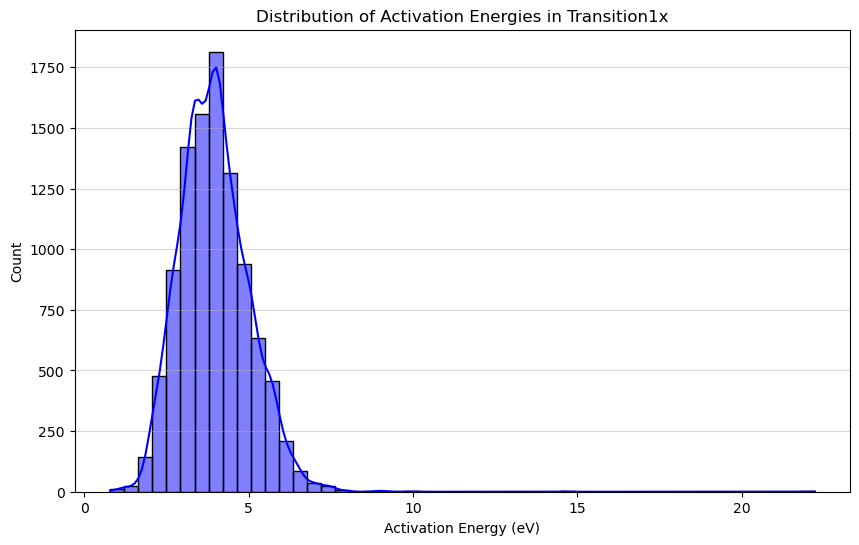

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate Basic Statistics
print("--- Activation Energy Statistics (eV) ---")
print(df_final['activation_energy'].describe())

# 2. Plot the Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_final['activation_energy'], kde=True, bins=50, color='blue')
plt.title('Distribution of Activation Energies in Transition1x')
plt.xlabel('Activation Energy (eV)')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.5)
plt.show()